## PYTHON FOR DATA ANALYSIS

In [1]:
#Imports de librairies
import pandas as pd
import numpy as np
import sklearn
import os
from sklearn.model_selection import train_test_split

### Téléchargement de la base de donnée

In [2]:
#import de data 

path ="C:\Users\Black Mamba\Documents\Python Scripts\MagicGammaTelescope.csv"

#Vérification du chemin 
assert(os.path.isfile(path))


In [3]:
#Création de la dataframe
dataf = pd.read_csv(path, index_col=0, parse_dates=True)

In [4]:
dataf.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.052,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
#Pour des résutats non ordonné nous allons utiliser la fonction random pour melanger aléatoirement les données  
dataf_rand=dataf.iloc[np.random.permutation(len(dataf))]
dataf_rand.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
86.3312,18.5662,2.6998,0.3453,0.1747,52.3208,85.3566,7.4530,7.6904,290.6360,g
32.9844,17.0734,2.5647,0.3869,0.2057,45.6145,-22.6128,-9.1443,2.3056,176.5120,g
13.3522,10.3405,2.1833,0.8000,0.4557,-13.8649,-5.7115,-11.5853,38.0087,66.0699,g
30.865,17.7682,2.7690,0.2962,0.1506,21.5222,18.1083,-10.9512,13.5322,181.9070,g
34.8695,9.2518,2.6056,0.4627,0.2445,-13.6702,-23.9980,-6.4127,62.0339,148.7149,h


In [6]:
#On re-strat l'index
df=dataf_rand.reset_index(drop = True)
df.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class
0,18.5662,2.6998,0.3453,0.1747,52.3208,85.3566,7.4530,7.6904,290.6360,g
1,17.0734,2.5647,0.3869,0.2057,45.6145,-22.6128,-9.1443,2.3056,176.5120,g
2,10.3405,2.1833,0.8000,0.4557,-13.8649,-5.7115,-11.5853,38.0087,66.0699,g
3,17.7682,2.7690,0.2962,0.1506,21.5222,18.1083,-10.9512,13.5322,181.9070,g
4,9.2518,2.6056,0.4627,0.2445,-13.6702,-23.9980,-6.4127,62.0339,148.7149,h


### Data-préparation

In [7]:
#d'après le pdf nous savons que le type de donnée est réel 
#néanmoins nous pouvons le tester comme suit

df.dtypes

fLenght     float64
fWidth      float64
fSize       float64
fConc1      float64
fAsym       float64
fM3Long     float64
FM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [8]:
#avec la colonne class (object type) 
#teste du level pour g et h

for level in ['class']:
    print("Levels for '{1}' : {0}".format(level,df[level].unique()))

Levels for '['g' 'h']' : class


In [9]:
#d'après le datacenter :
# "In the real data, the h class represents the majority of the events.""
#tenons compte de ces informations 
df['Class'] = df['class'].map({'g':1 , 'h' : 0})

In [10]:
#"g" prendra pour valeur 1 et "h" prendra pour valeur 0: 
#On enregistre les étiquettes des classes que nous devons prédire
#dans une differente variable .
df_class = df['class'].values

### Visualisation des données

In [11]:
#Ratio du plus grand pixel par rapport à fSize

In [12]:
positifconc = df.fConc1>0.1

In [13]:
negatifconc = df.fConc1<0.1

In [14]:
nb_negatifconc = df[negatifconc]["fConc1"].count()
nb_positifconc = df[positifconc]["fConc1"].count()

In [15]:
nb_negatifconc, nb_positifconc 

(2710, 16305)

In [16]:
DataBase = df

In [17]:
DataBase["positif"] = positifconc

In [18]:
DataBase.head()

,fLenght,fWidth,fSize,fConc1,fAsym,fM3Long,FM3Trans,fAlpha,fDist,class,Class,positif
0,18.5662,2.6998,0.3453,0.1747,52.3208,85.3566,7.4530,7.6904,290.6360,g,1,True
1,17.0734,2.5647,0.3869,0.2057,45.6145,-22.6128,-9.1443,2.3056,176.5120,g,1,True
2,10.3405,2.1833,0.8000,0.4557,-13.8649,-5.7115,-11.5853,38.0087,66.0699,g,1,True
3,17.7682,2.7690,0.2962,0.1506,21.5222,18.1083,-10.9512,13.5322,181.9070,g,1,True
4,9.2518,2.6056,0.4627,0.2445,-13.6702,-23.9980,-6.4127,62.0339,148.7149,h,0,True


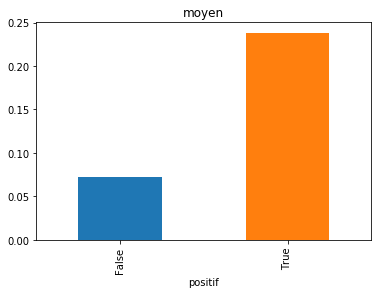

In [19]:
%matplotlib inline
DataBase.groupby(["positif"])["fConc1"].mean().plot.bar(title="moyen")

### Modélisation

In [20]:
#importation des librarie pour éffectuer la modelisation
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
#verification des données 
df = pd.get_dummies(df)
df.shape

(19020, 13)

In [22]:
#X = dataset.data
#y = dataset.target
X = df[df.columns[:1]]
y = df[df.columns[-1]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y) 

#### Algorithme modele

In [24]:
from sklearn.metrics import accuracy_score

#le modele
algo   = RandomForestClassifier(random_state = 42,
                    n_jobs = -1,
                    n_estimators=16,
                    criterion='entropy',
                    max_depth=16
                    )
#Le fit pour x_train et y_train
modele = algo.fit(X_train, y_train)

# La prédiction
y_pred = algo.predict(X_test)

#Le resultat
accuracy_score(y_test, y_pred)

0.7301787592008412

### Optimisation des hyperparamètres

In [25]:
from sklearn import grid_search
#Utilisation du grid search avec les paramettre utiliser en cours 
parameters = {  'gamma' : [0.01, 0.1, 0.5]           ,
                 "probability" : [True]}
grid       = grid_search.GridSearchCV(algorithme, parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_.score(X_test, y_test)

0.85276119403 0.877696969697


### Visualisation des performances

For model KNN accuracy = 0.720925341745531


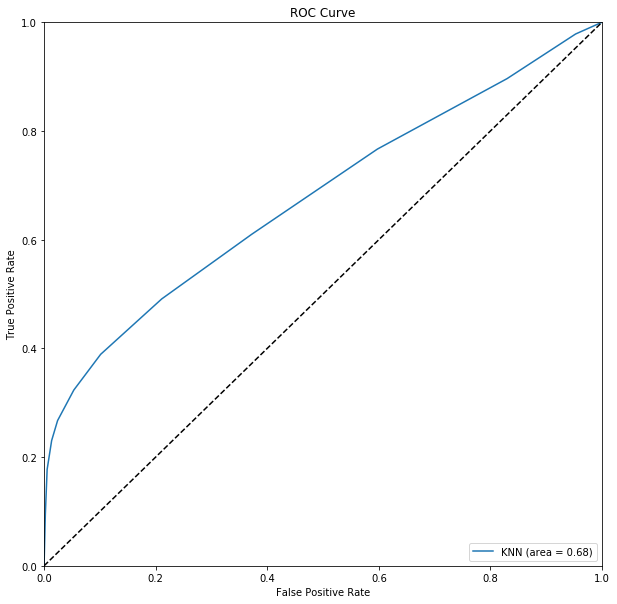

For model Quadrant accuracy = 0.7184016824395373


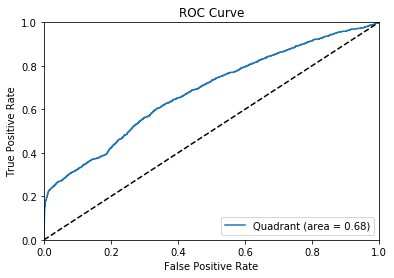

For model L1 logistic accuracy = 0.7202944269190326


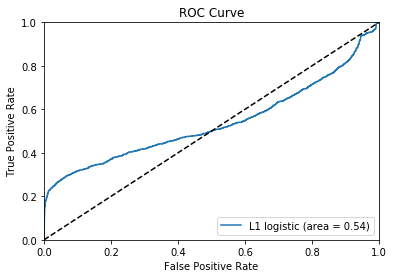

For model L2 logistic accuracy = 0.7202944269190326


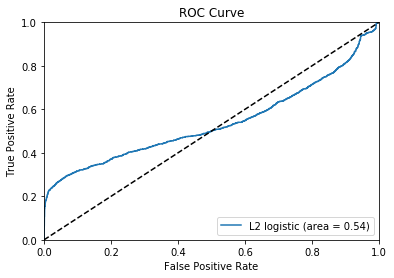

For model AdaBoost accuracy = 0.7396424815983176


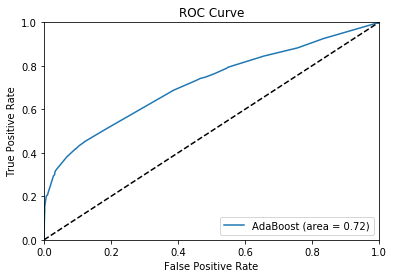

For model RF5 accuracy = 0.6426919032597266


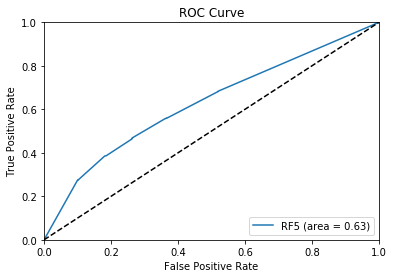

For model NB accuracy = 0.7184016824395373


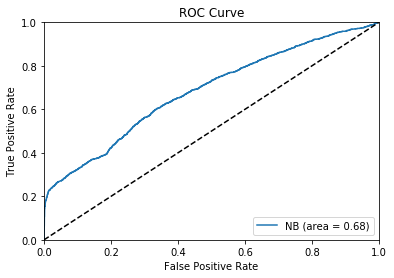

For model RF50 accuracy = 0.6361724500525763


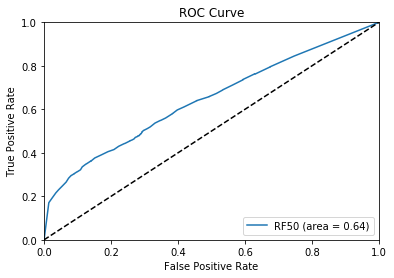

For model MLP accuracy = 0.7211356466876971


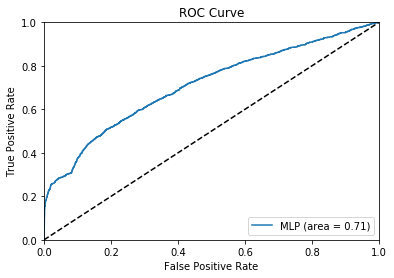

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_curve, auc,fbeta_score, make_scorer,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Utilisation du classifier 
# Import des libraries
# Calibrage C

C = 10

classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'KNN': KNeighborsClassifier(n_neighbors=11),
               'MLP':MLPClassifier(alpha=1),
               'NB': GaussianNB(),
               'RF5': RandomForestClassifier(n_estimators=5),
               'RF50': RandomForestClassifier(n_estimators=50),
               'AdaBoost': AdaBoostClassifier(),
               'Quadrant' : QuadraticDiscriminantAnalysis(),
               'L2 logistic': LogisticRegression(C=C, penalty='l2')
               }


# taille du schéma
plt.figure(figsize=(10,10))

#  classifier methode
# score teste X_test et y_test via y_pred
n_classifiers = len(classifiers)
for index, (name, clf) in enumerate(classifiers.iteritems()):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)
    print 'For model', name, 'accuracy =', clf.score(X_test, y_test)


# Mise en place des paramettre d'affichage , insertion du roc_auc     
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
